In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:

df.shape

(284807, 31)

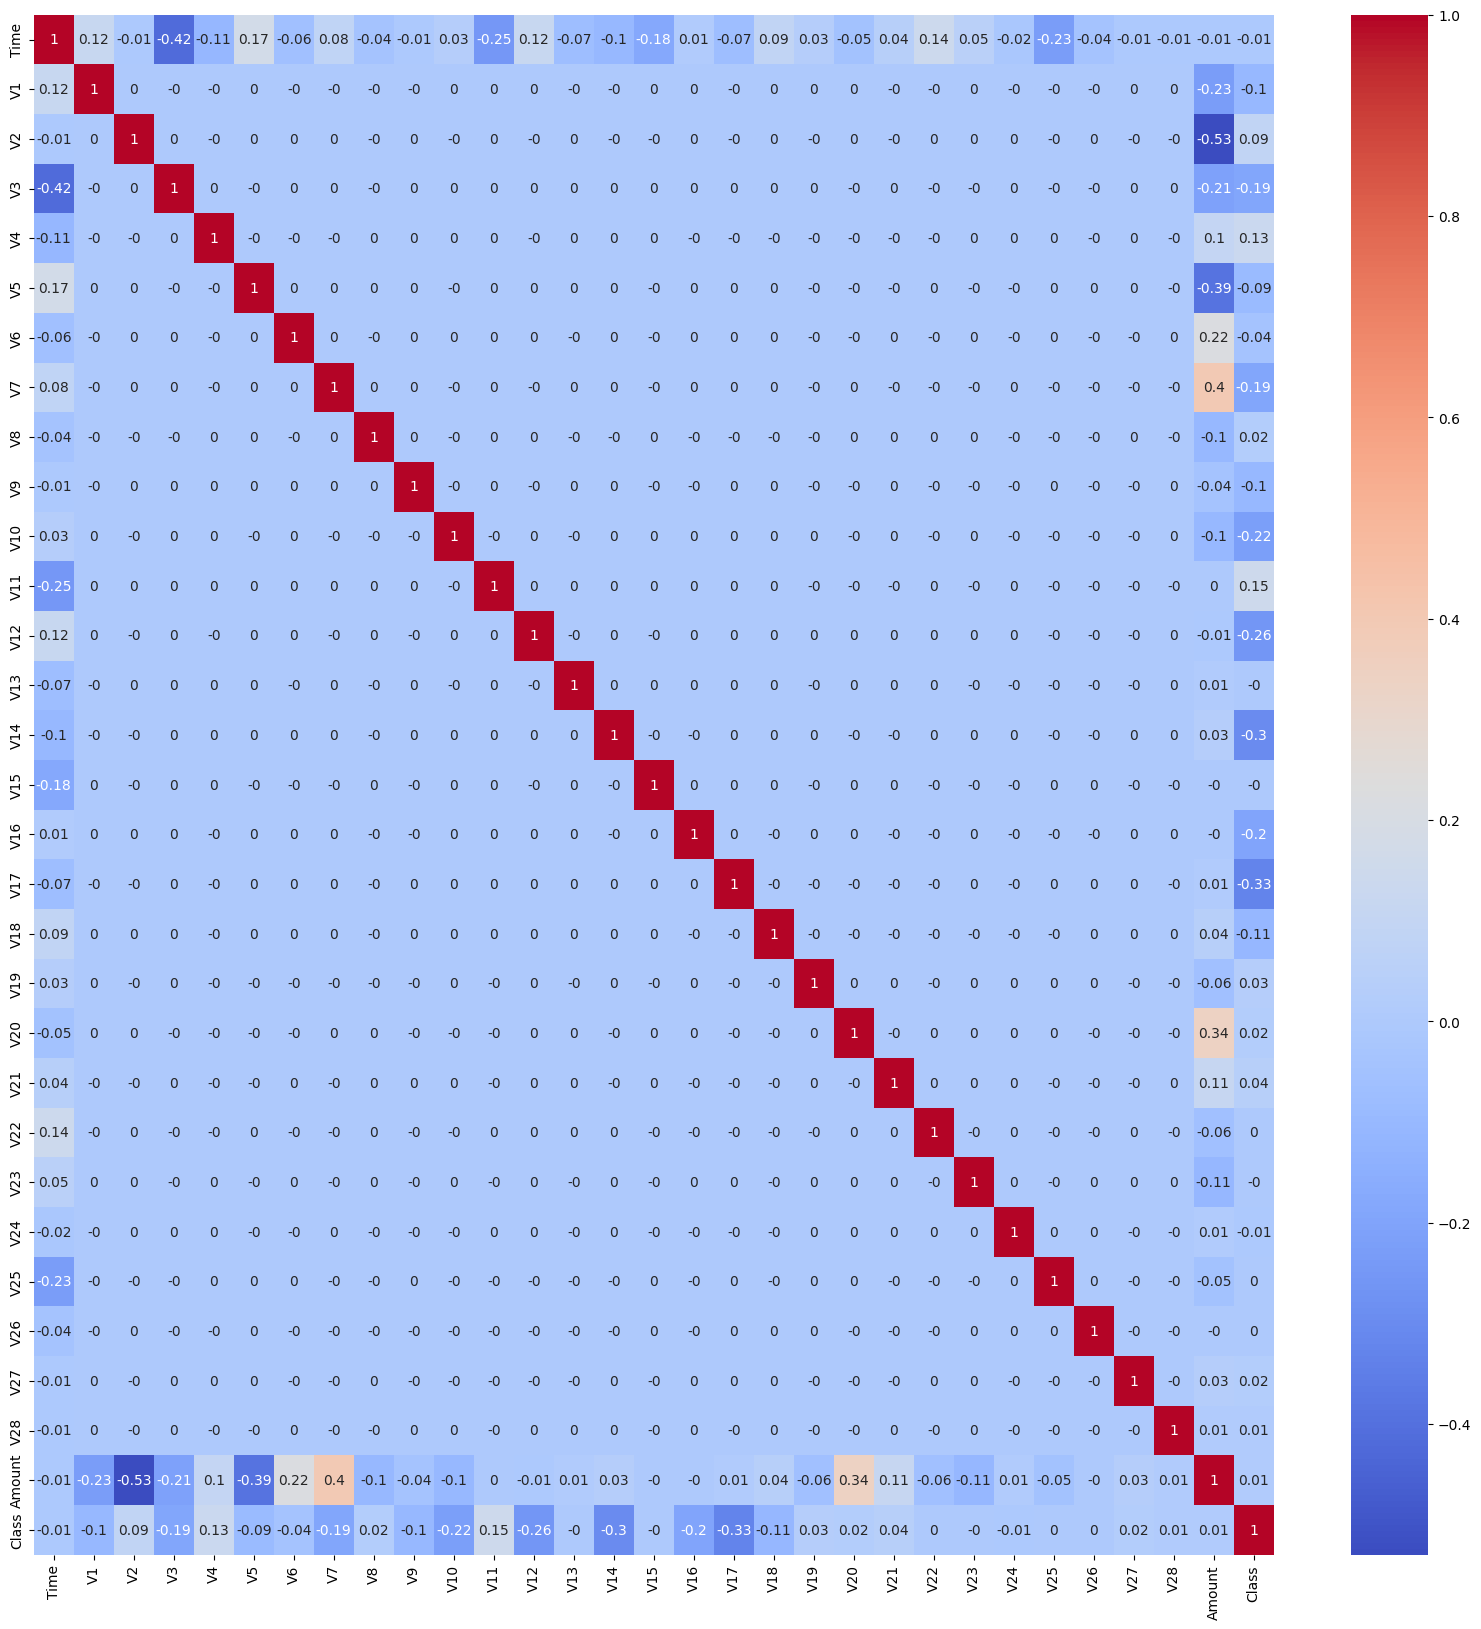

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().round(2), annot = True, cmap = 'coolwarm')
plt.show()

In [9]:
# Outliers are there for the reason. They are not just any data and they largely influence the overall colinearity between the variables. Although anything outside the upper and lower bound is eliminated, we still need these data to understand the variable dynamics.
# Taking out all the values of the available column will take away 'class' values also.

imp_col = ['V11', 'V4', 'V2', 'V19']

for col in imp_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  df = df[(df[col] > lower) & (df[col] < upper)]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [10]:
x = df[imp_col]
x

,V11,V4,V2,V19
0,-0.551600,1.378155,-0.072781,0.403993
1,1.612727,0.448154,0.266151,-0.145783
3,-0.226487,-0.863291,-0.185226,-1.232622
4,-0.822843,0.403034,0.877737,0.803487
5,1.341262,-0.168252,0.960523,-0.033194
...,...,...,...,...
284800,0.523316,0.234580,-0.175233,0.561695
284801,0.644837,-0.745097,0.931005,0.128904
284803,-0.150189,-0.738589,-0.055080,-1.545556
284804,0.411614,-0.557828,-0.301254,-0.577252


In [11]:
y = df['Class']
y

,Class
0,0
1,0
3,0
4,0
5,0
...,...
284800,0
284801,0
284803,0
284804,0


,Class
0,True
1,True
3,True
4,True
5,True
...,...
284800,True
284801,True
284803,True
284804,True


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
print(x_test.shape, x_train.shape, y_train.shape, y_test.shape)

(50258, 4) (201029, 4) (201029,) (50258,)


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9994627720959847
[[50231     0]
 [   27     0]]


In [20]:
# Predictive Analysis

input_data = (-0.226487, -0.863291, -0.185226, -1.232622)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('The Transaction is Legitimate')
else:
  print('The Transaction is Fraudulent')

[0]
The Transaction is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


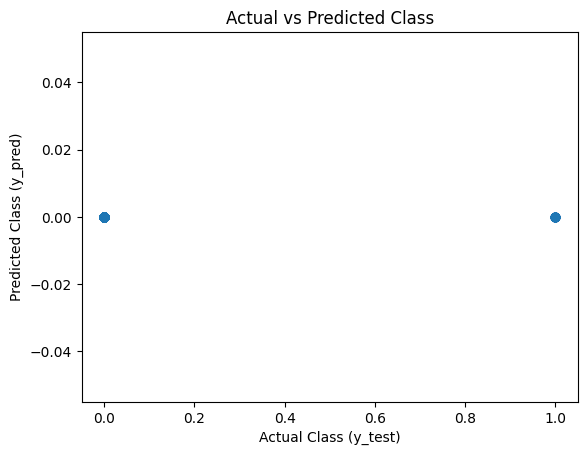

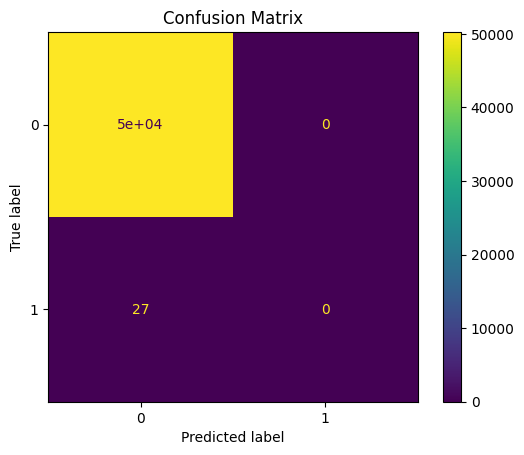

In [21]:
# prompt: visual analysis for y_test and y_pred

import matplotlib.pyplot as plt

# Create a scatter plot of y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Class (y_test)")
plt.ylabel("Predicted Class (y_pred)")
plt.title("Actual vs Predicted Class")
plt.show()

# You can also use a confusion matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


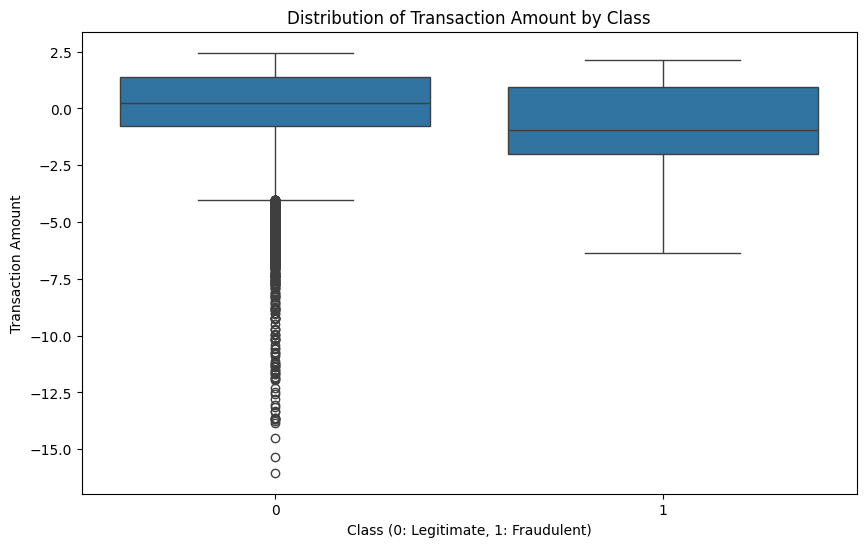

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


KeyboardInterrupt: 

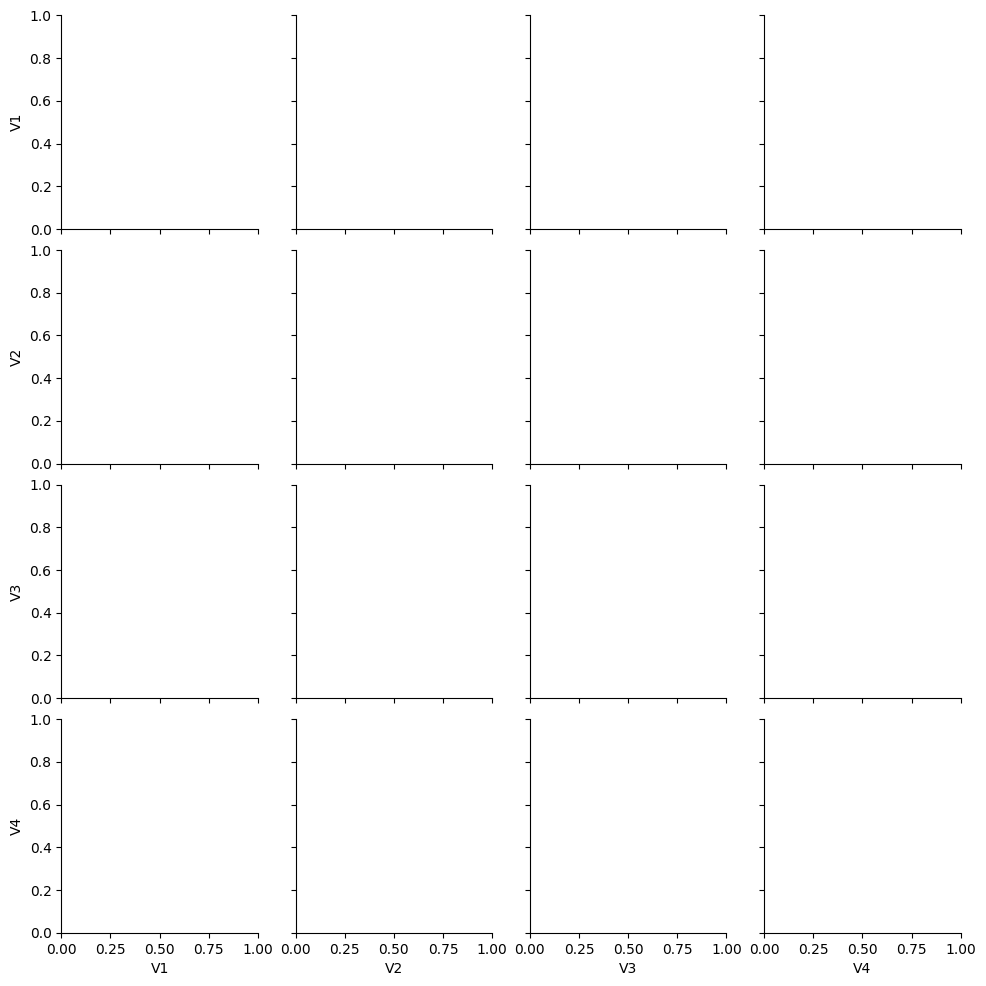

In [23]:
# prompt: few more analytical graphs for better understanding

# Distribution of transaction amounts for fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='V1', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

# Pairplot for selected features and class
sns.pairplot(df[['V1', 'V2', 'V3', 'V4', 'Class']], hue='Class')
plt.show()


# Countplot of fraudulent vs. legitimate transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Number of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


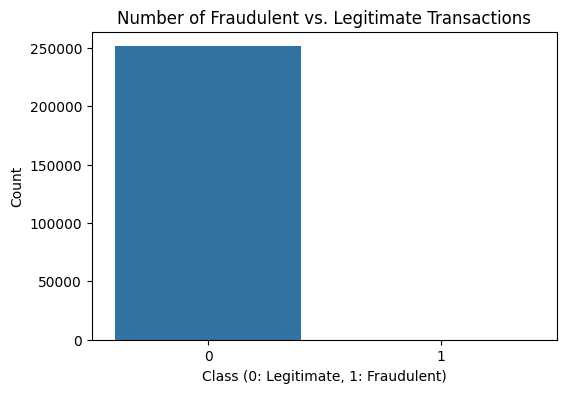

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Number of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


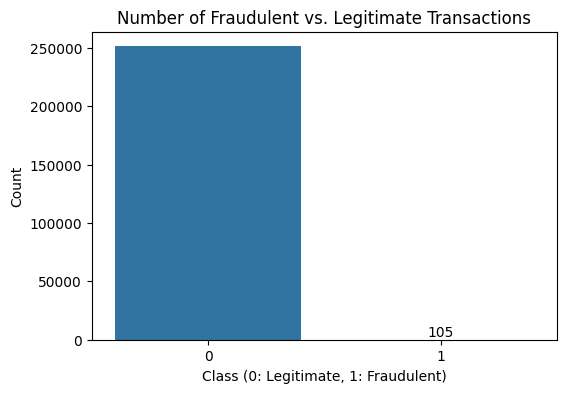

In [27]:
# prompt: make fradulent visible in abvoe graph

# Countplot of fraudulent vs. legitimate transactions with emphasis on fraudulent
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Number of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Highlight the fraudulent transactions bar
fraudulent_count = df['Class'].value_counts()[1]
plt.text(1, fraudulent_count, str(fraudulent_count), ha='center', va='bottom')

plt.show()
